<a href="https://colab.research.google.com/github/mariasakorafou/maria1/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod
!pip install ppscore

In [3]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt
import ppscore as pps

df = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [4]:
# Υπολογισμός πίνακα PPS
pps_matrix = pps.matrix(df_numeric)[['x', 'y', 'ppscore']]
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

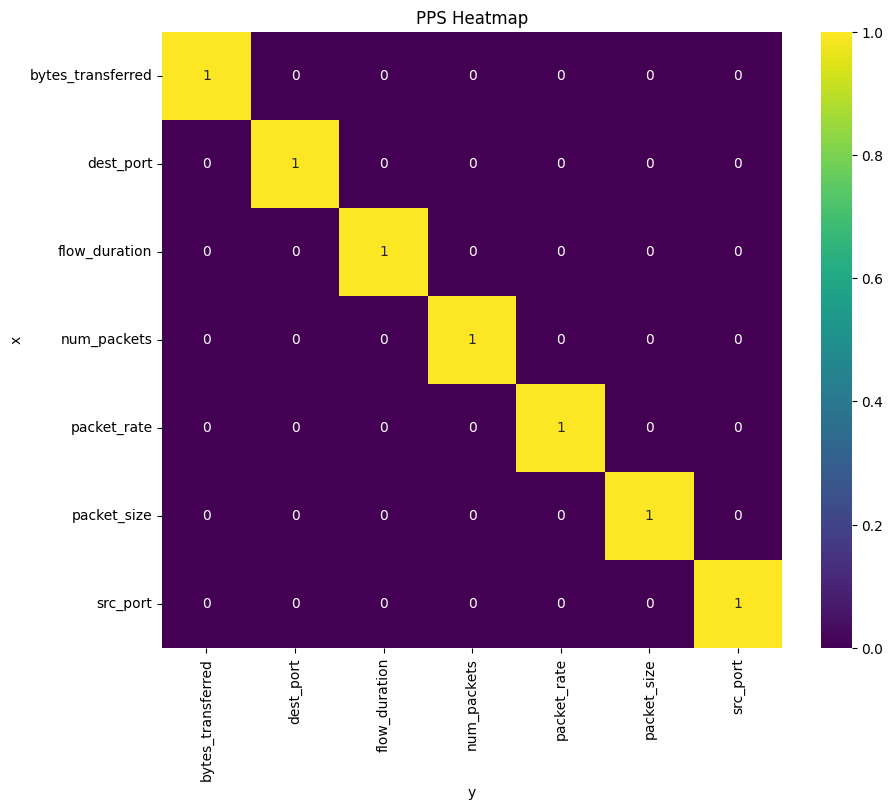

In [5]:

#οπτικοποίηση αποτελεσμάτων
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(pps_pivot, annot=True, cmap='viridis', cbar=True)
plt.title('PPS Heatmap')
plt.show()


In [6]:
# Εμφάνιση του πίνακα PPS
print(pps_pivot)

# Εντοπισμός μεταβλητών με υψηλή προγνωστική ισχύ
high_pps = pps_matrix[pps_matrix['ppscore'] > 0.2]
print("Μεταβλητές με PPS > 0.2:")
print(high_pps)


y                  bytes_transferred  dest_port  flow_duration  num_packets  \
x                                                                             
bytes_transferred                  1          0              0            0   
dest_port                          0          1              0            0   
flow_duration                      0          0              1            0   
num_packets                        0          0              0            1   
packet_rate                        0          0              0            0   
packet_size                        0          0              0            0   
src_port                           0          0              0            0   

y                  packet_rate  packet_size  src_port  
x                                                      
bytes_transferred            0            0         0  
dest_port                    0            0         0  
flow_duration                0            0         0  
num_pack

In [7]:
# Επιλογή χαρακτηριστικών με βάση το PPS
selected_features = high_pps['x'].unique()
print("Επιλεγμένα χαρακτηριστικά για το μοντέλο:")
print(selected_features)

Επιλεγμένα χαρακτηριστικά για το μοντέλο:
['src_port' 'dest_port' 'packet_size' 'num_packets' 'flow_duration'
 'bytes_transferred' 'packet_rate']


In [8]:
# Δημιουργία νέου DataFrame με τα επιλεγμένα χαρακτηριστικά
df_selected = df_numeric[selected_features]